# Regresion Basica: Predecir eficiencia de gasolina

Este libro usa el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construye un modelo para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Este ejemplo usa el API `tf.keras` , revise [Esta Guia](https://www.tensorflow.org/guide/keras) para obtener mas detalles.

In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

## El set de Datos de MPG

El set de datos esta disponible de el siguiente repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

### Obtenga los datos
Primero descargue el set de datos.
keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [226]:
dataset = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset

'C:\\Users\\inilo\\.keras\\datasets\\auto-mpg.data'

Importelo usando pandas.

In [227]:
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin", "Car name"]

In [228]:
df = pd.read_csv(dataset, names=column_names, delim_whitespace=True)
df

C:\Users\inilo\AppData\Local\Temp\ipykernel_36180\4045023703.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(dataset, names=column_names, delim_whitespace=True)


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


### Limpia los datos

Trata los missings y variables categóricas

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [230]:
df["Horsepower"] = df["Horsepower"].replace('?', np.nan)

In [231]:
df.dropna(inplace=True)

In [232]:
df["Origin"] = df["Origin"].map({1: "USA", 2: "Europe", 3: "Japan"})

In [233]:
df = pd.get_dummies(df, columns=["Origin"])
df[["Origin_USA", "Origin_Europe", "Origin_Japan"]] = df[["Origin_USA", "Origin_Europe", "Origin_Japan"]].astype(int)

In [234]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Car name,Origin_Europe,Origin_Japan,Origin_USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,ford mustang gl,0,0,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,vw pickup,1,0,0
395,32.0,4,135.0,84.00,2295.0,11.6,82,dodge rampage,0,0,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,ford ranger,0,0,1


### Divide los datos en train y test

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

NOTA: El resultado tienen que ser dos datasets

In [235]:
# df.drop(columns=["Car name", "Origin", "Marca"], inplace=True)
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Car name,Origin_Europe,Origin_Japan,Origin_USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,0,0,1


In [236]:
df.drop("Car name",axis=1,inplace=True)

In [237]:
df_train = df.sample(frac=0.8,random_state=42)

In [238]:
df_train

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
79,26.0,4,96.0,69.00,2189.0,18.0,72,1,0,0
276,21.6,4,121.0,115.0,2795.0,15.7,78,1,0,0
248,36.1,4,91.0,60.00,1800.0,16.4,78,0,1,0
56,26.0,4,91.0,70.00,1955.0,20.5,71,0,0,1
393,27.0,4,140.0,86.00,2790.0,15.6,82,0,0,1
...,...,...,...,...,...,...,...,...,...,...
218,36.0,4,79.0,58.00,1825.0,18.6,77,1,0,0
281,19.8,6,200.0,85.00,2990.0,18.2,79,0,0,1
342,30.0,4,135.0,84.00,2385.0,12.9,81,0,0,1
238,33.5,4,98.0,83.00,2075.0,15.9,77,0,0,1


In [239]:
df_test = df.drop(df_train.index)

In [240]:
df_test

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
13,14.0,8,455.0,225.0,3086.0,10.0,70,0,0,1
20,25.0,4,110.0,87.00,2672.0,17.5,70,1,0,0
21,24.0,4,107.0,90.00,2430.0,14.5,70,1,0,0
35,17.0,6,250.0,100.0,3329.0,15.5,71,0,0,1
...,...,...,...,...,...,...,...,...,...,...
381,36.0,4,107.0,75.00,2205.0,14.5,82,0,1,0
388,26.0,4,156.0,92.00,2585.0,14.5,82,0,0,1
391,36.0,4,135.0,84.00,2370.0,13.0,82,0,0,1
395,32.0,4,135.0,84.00,2295.0,11.6,82,0,0,1


### Inspecciona los datos

Revise rapidamente la distribucion conjunta del dataset de entrenamiento mediante un grid de gráficos

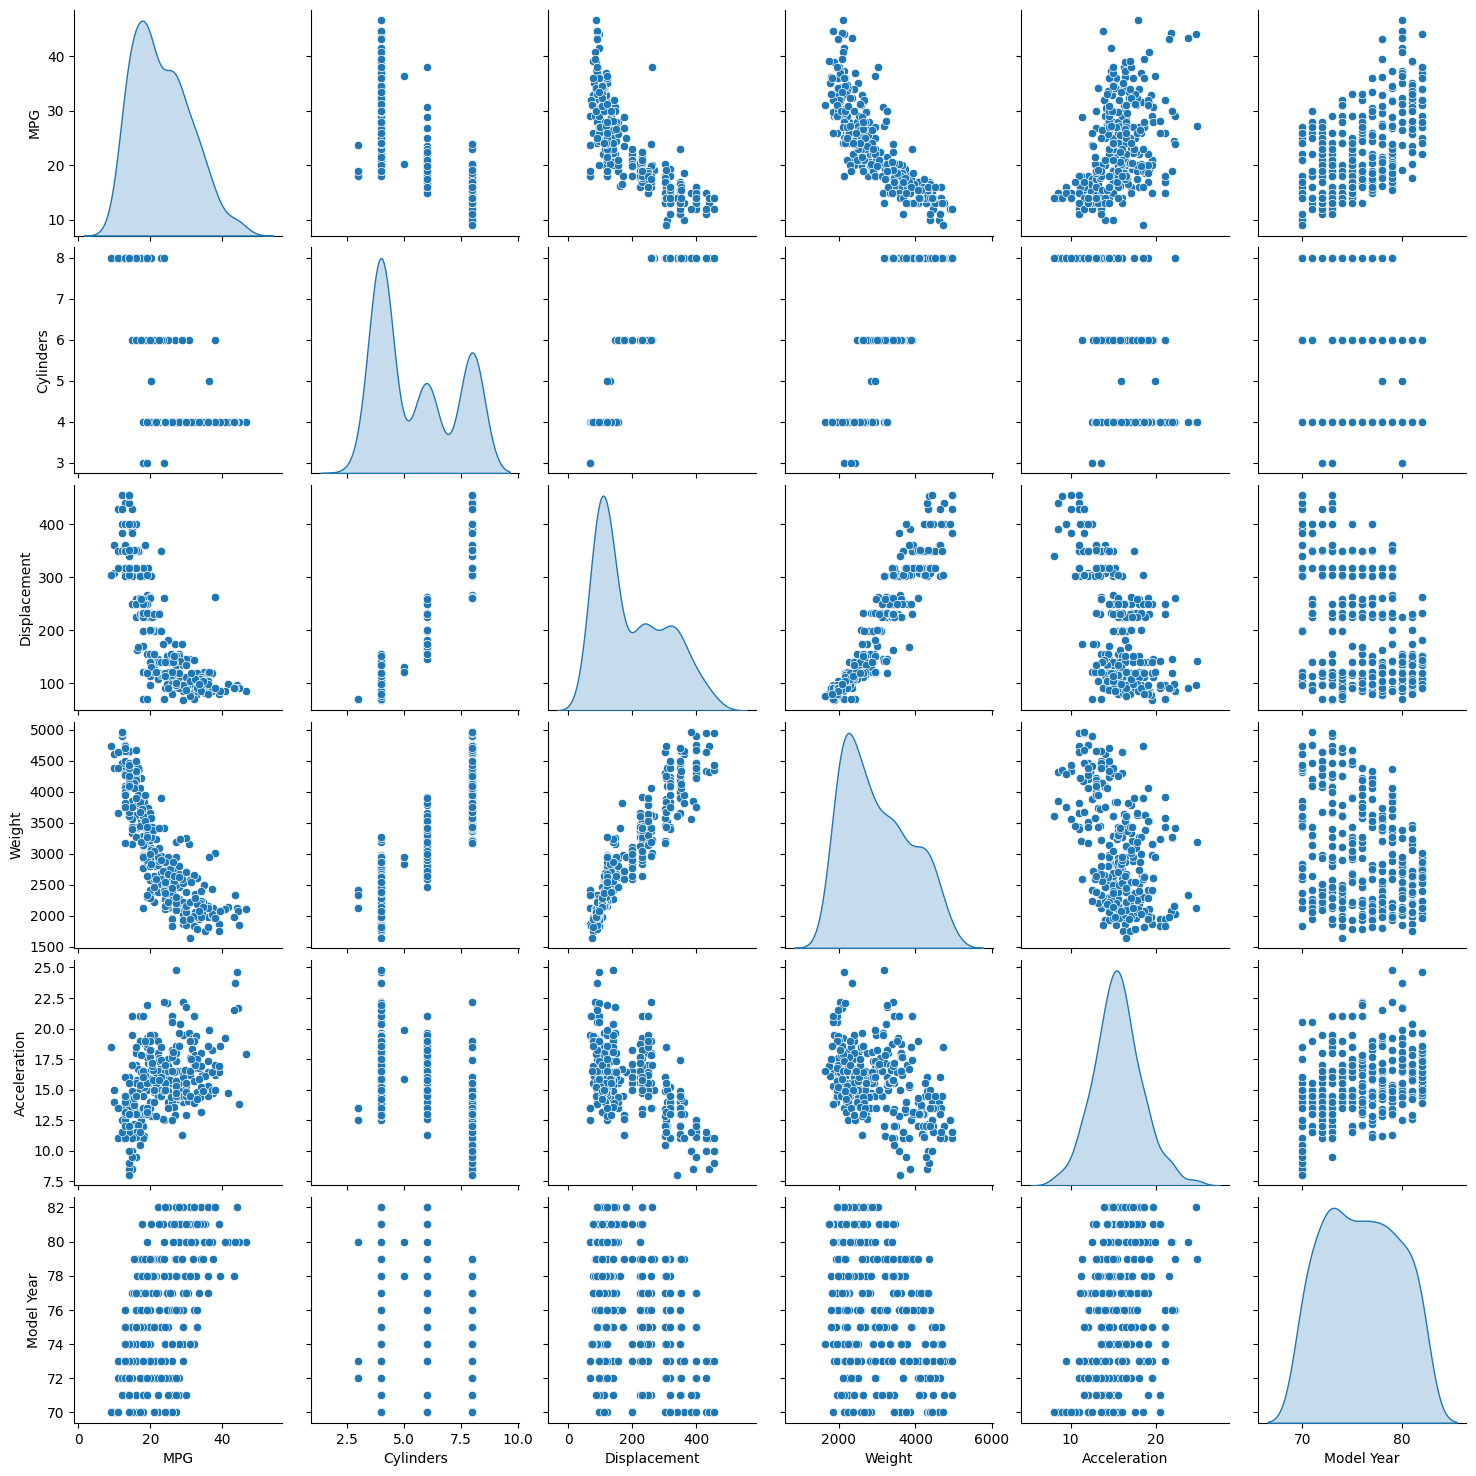

In [241]:
sns.pairplot(df_train[["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year"]], diag_kind="kde")

Tambien revise las estadisticas generales:

In [242]:
df_train.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.153822,5.531847,197.855096,3005.745223,15.510828,75.910828,0.171975,0.203822,0.624204
std,7.861854,1.729449,106.501896,859.060925,2.803560,3.688989,0.377961,0.403481,0.485101
min,9.000000,3.000000,68.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,2231.000000,13.625000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.000000,151.000000,2831.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,28.075000,8.000000,302.000000,3641.750000,17.000000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,4955.000000,24.800000,82.000000,1.000000,1.000000,1.000000


### Separa las features del target

Separe el target de las features.

In [243]:
df_train_sintarget = df_train.pop("MPG")
df_test_sintarget = df_test.pop("MPG")

In [244]:
df_train

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
79,4,96.0,69.00,2189.0,18.0,72,1,0,0
276,4,121.0,115.0,2795.0,15.7,78,1,0,0
248,4,91.0,60.00,1800.0,16.4,78,0,1,0
56,4,91.0,70.00,1955.0,20.5,71,0,0,1
393,4,140.0,86.00,2790.0,15.6,82,0,0,1
...,...,...,...,...,...,...,...,...,...
218,4,79.0,58.00,1825.0,18.6,77,1,0,0
281,6,200.0,85.00,2990.0,18.2,79,0,0,1
342,4,135.0,84.00,2385.0,12.9,81,0,0,1
238,4,98.0,83.00,2075.0,15.9,77,0,0,1


### Estandariza los datos

Es una buena práctica estandarizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo podría converger sin estandarizar, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

In [245]:
from sklearn.preprocessing import StandardScaler

In [246]:
standard = StandardScaler()
df_train_esc = standard.fit_transform(df_train)
df_test_esc = standard.fit_transform(df_test)

Estos datos estandarizados es lo que usaremos para entrenar el modelo.

## El modelo

### Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo.

Por tanto, tendrá tres capas. Una de entrada con activación relu. Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres para las dos primeras capas.

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

In [247]:
import tensorflow as tf
from tensorflow.keras import layers

In [248]:
model = keras.Sequential([
layers.Dense(64, activation='relu', input_shape=[len(df_train.keys())]),
layers.Dense(64, activation='relu'),
layers.Dense(1)
])

model.compile(loss='mse',
            optimizer=tf.keras.optimizers.RMSprop(0.001),
            metrics=['mae', 'mse'])

c:\Users\inilo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Inspeccione el modelo

Use el método `.summary` para imprimir una descripción simple del modelo

In [249]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenar el modelo

Entrene el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

NOTA: recuerda usar los datos normalizados.

In [250]:
history = model.fit(
  df_train_esc, 
  df_train_sintarget,
  epochs=1000, 
  validation_split = 0.2, 
  verbose=1
)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 587.3378 - mae: 23.0164 - mse: 587.3378 - val_loss: 495.5338 - val_mae: 20.8243 - val_mse: 495.5338
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 525.4911 - mae: 21.6239 - mse: 525.4911 - val_loss: 453.3130 - val_mae: 19.7689 - val_mse: 453.3130
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 474.6859 - mae: 20.3993 - mse: 474.6859 - val_loss: 406.2313 - val_mae: 18.5575 - val_mse: 406.2313
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 440.3225 - mae: 19.4436 - mse: 440.3225 - val_loss: 352.9395 - val_mae: 17.1199 - val_mse: 352.9395
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 383.2751 - mae: 18.1131 - mse: 383.2751 - val_loss: 296.1379 - val_mae: 15.4626 - val_mse: 296.1379
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 322.9971 - mae: 16.3993 - mse: 322.9971 - val_loss: 238.8790 - val_mae: 13.6381 - val_mse: 238.8790
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

In [251]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.465060,1.031831,2.465060,6.953108,2.146202,6.953108,995
996,2.501981,1.019569,2.501981,6.416103,2.051664,6.416103,996
997,2.608298,1.085143,2.608298,6.340058,1.937039,6.340058,997
998,2.554345,1.051020,2.554345,6.360216,1.871456,6.360216,998
999,2.492900,1.060565,2.492900,6.211261,1.929199,6.211261,999


¿Alguna conclusión respecto a este gráfico?

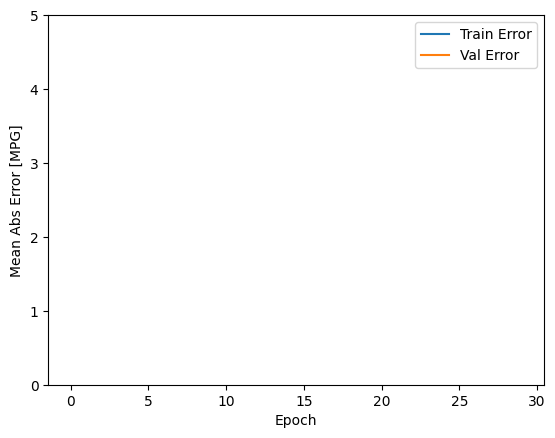

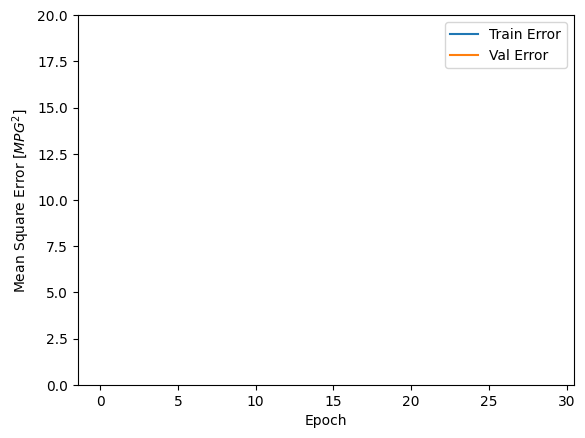

In [259]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

Earlystopping me ha ayudado a detener el entrenamiento para no caer en overfitting, también para ahorrar recursos innecesarios.

Observamos que si le damos muchas epochs al entrenamiento tiende a un overfitting, siendo el error en validación cada vez más alto. Sería interesante utilizar un número aprox de 30 epochs

In [252]:
EPOCHS = 30

Añade un early stopping al modelo. Pon el argumento `callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]` dentro del fit().

Visualiza el progreso de entrenamiento.

In [261]:
history = model.fit(
  df_train_esc, 
  df_train_sintarget,
  epochs=EPOCHS, 
  validation_split = 0.2, 
  verbose=1,
  callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 40.5771 - mae: 4.8920 - mse: 40.5771 - val_loss: 33.7763 - val_mae: 4.4650 - val_mse: 33.7763
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 32.9326 - mae: 4.5621 - mse: 32.9326 - val_loss: 24.0203 - val_mae: 3.8088 - val_mse: 24.0203
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 24.3374 - mae: 3.8497 - mse: 24.3374 - val_loss: 18.2222 - val_mae: 3.2426 - val_mse: 18.2222
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 15.4852 - mae: 3.1122 - mse: 15.4852 - val_loss: 13.7494 - val_mae: 2.7914 - val_mse: 13.7494
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.9400 - mae: 2.6784 - mse: 10.9400 - val_loss: 11.0380 - val_mae: 2.5136 - val_mse: 11.0380
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.8526 - mae: 2.3571 - mse: 8.8526 - val_loss: 9.3444 - val_mae: 2.2563 - val_mse: 9.3444
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.1201 - mae: 2.1033 - mse: 7.1201 - val_

Interpreta el gráfico

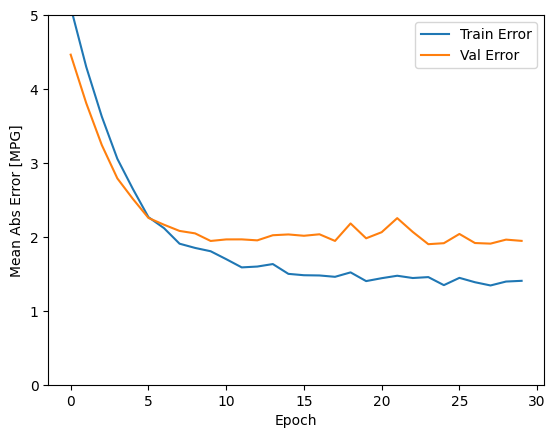

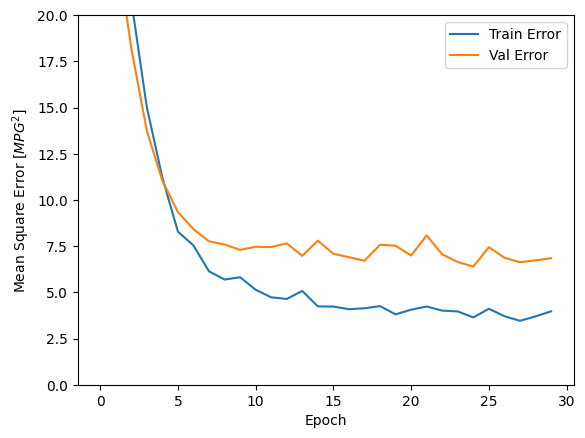

In [262]:
plot_history(history)

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [263]:
loss, mae, mse = model.evaluate(df_test_esc, df_test_sintarget, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - 26ms/step - loss: 12.6437 - mae: 2.7492 - mse: 12.6437
Testing set Mean Abs Error:  2.75 MPG


Ahora prueba el modelo. Coge 10 ejemplos de test y llama a` model.predict`.

In [264]:
test_predictions = model.predict(df_test_esc).flatten()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


### Haz Predicciones

Dibuja en un scatter plot las predicciones de test vs sus true labels.

In [256]:
df_test

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_Europe,Origin_Japan,Origin_USA
1,8,350.0,165.0,3693.0,11.5,70,0,0,1
13,8,455.0,225.0,3086.0,10.0,70,0,0,1
20,4,110.0,87.00,2672.0,17.5,70,1,0,0
21,4,107.0,90.00,2430.0,14.5,70,1,0,0
35,6,250.0,100.0,3329.0,15.5,71,0,0,1
...,...,...,...,...,...,...,...,...,...
381,4,107.0,75.00,2205.0,14.5,82,0,1,0
388,4,156.0,92.00,2585.0,14.5,82,0,0,1
391,4,135.0,84.00,2370.0,13.0,82,0,0,1
395,4,135.0,84.00,2295.0,11.6,82,0,0,1


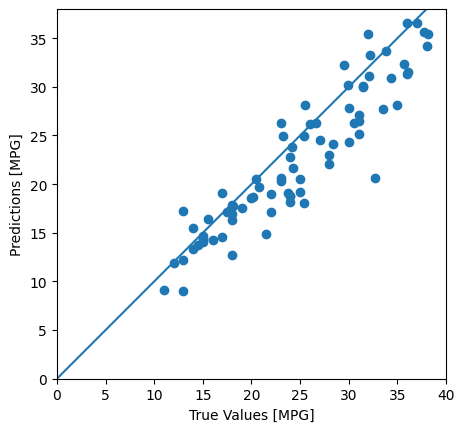

In [266]:
plt.scatter(df_test_sintarget, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

Representa los residuos en un histograma

Text(0.5, 0, 'Prediction Error [MPG]')

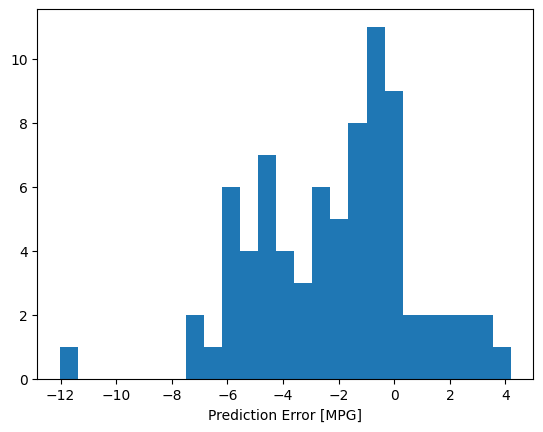

In [267]:
errores = test_predictions - df_test_sintarget
plt.hist(errores, bins = 25)
plt.xlabel("Prediction Error [MPG]")

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

Guarda tu modelo en un archivo.

In [269]:
model.save("model.keras")

## Conclusion